In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

from sympy import *

## Introduction

Derivatives are used whenever we need to deal with rates of change (like velocity and acceleration, biological and economic growth, heat transfer, etc.).

They are useful in processes of optimization in Operation Research and Computer Science and learning algorithms for Artificial Intelligence.

In Mathematics derivatives are widely used to locally approximate/estimate nonlinear functions (which are hard to use) with linear functions (which are easy to use). This is an important part of Calculus (eg, Taylor Series).

How programmers, namely in Python, deal with derivatives?


## Symbolic Differentiation

Python's module `sympy` includes function `Derivative` that performs symbolic differentiation, ie, it performs the algebraic manipulation and returns an expression with the derivative:

In [ ]:
x, y = symbols('x y')
expr = y*x**2 + 2 * y + y**3
print("Expression : {} ".format(expr))

expr_diff = diff(expr, x)
print("derivative : {}".format(expr_diff))

value_diff = expr_diff.evalf(subs={x:1,y:4})
print("Value of derivative at (1,4): {0:3.2f}".format(value_diff))

Expression : x**2*y + y**3 + 2*y 
derivative : 2*x*y
Value of derivative at (1,4): 8.00


We can use it to compute a second derivative, in this case $$\frac{\partial^2 f}{\partial x \partial y}$$

In [ ]:
second_diff = Derivative(expr_diff, y)
print("Value of the 2nd derivative : {} ".format(second_diff.doit()))

Value of the derivative : 2*x 


One potential problem is that differential expressions can increase expontentially making them, on those cases, prohibitively slow.

## Numerical Differentiation

This process uses the math formula that defines differentials

$$f'(a) = \lim_{h \rightarrow 0} \frac{f(a+h) - f(a)}{h}$$

There is more than one expression to approximate this value. Here is the _central difference_ formula:

$$f'(a) \approx \frac{1}{2} \left( \frac{f(a + h) - f(a)}{h} + \frac{f(a) - f(a - h)}{h} \right) = \frac{f(a + h) - f(a - h)}{2h}$$

We can implement this easily on Python:

In [ ]:
def derivative(f, a, h=1e-7):
  return (f(a + h) - f(a - h))/(2*h)

What is the derivative of $f(x) = x^2 + 5$ at $x=2.5$? We know by the definition that $f'(x) = 2x$ so the result should be $5$.

Let's check the approximation:

In [ ]:
def f(x):
  return x**2 + 5

print(derivative(f, 2.5))

4.9999999873762135


Module `scipy` has a function that does this for us:

In [ ]:
import scipy.misc as spm

spm.derivative(f, 2.5, dx=1e-3)

4.999999999999893

And what about numerical differentiation on second order derivatives?

Can we compute, say, $\frac{\partial^2 f}{\partial x \partial y}$ numerically?

For second derivative over the same variable, there are again several approximations. This is one:

$$\frac{\partial^2 f}{\partial x^2}(a,b) \approx \frac{-f(a-h,b) + 2f(a,b)-f(a+h,b)}{h^2}$$

For mixed variables we can use the next formula [[ref](https://www.uio.no/studier/emner/matnat/math/MAT-INF1100/h07/undervisningsmateriale/kap7.pdf)]

$$\frac{\partial^2 f}{\partial x \partial y}(a,b) \approx \frac{f(a+h_1,b+h_2) - f(a+h_1,b-h_2) - f(a-h_1,b+h_2) + f(a-h_1,b-h_2)}{4h_1 h_2}$$

Module `numdifftools`  solves automatic numerical differentiation problems in one or more variables. [website](https://pypi.org/project/numdifftools/)

### Example: Taylor Expansion

Derivatives are essential to compute the Taylor expansion of functions. [[ref](https://www.math.ubc.ca/~pwalls/math-python/differentiation/differentiation/)]

The Taylor expansion is the infinite series

$$f(x) \approx f(a) +  f^{'}(a)(x - a) + \frac{1}{2!} f^{''}(a) (x - a)^{2} + \frac{1}{3!} f^{(3)}(a) (x - a)^{3} \ldots$$

Let's say we wish the approximate function

$$f(x) = \frac{3e^x}{x^2 + x + 1}$$

around $x=1$


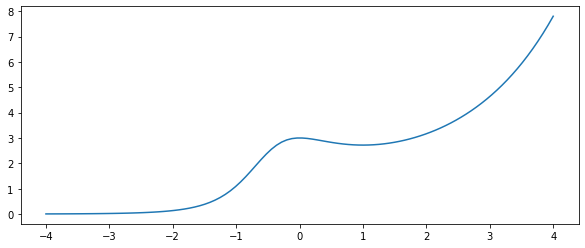

In [ ]:
xs = np.linspace(-4,4,100)
f  = lambda x : 3*np.exp(x) / (x**2 + x + 1)

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(xs, f(xs));

The Taylor expansion needs the coefficients $$a_n = \frac{1}{n!} f^{(n)}(1)$$

Let's make the approximation of degree 3

In [ ]:
x = 1

a0 = f(x)
a1 = spm.derivative(f, x, dx=1e-3, n=1)
a2 = spm.derivative(f, x, dx=1e-3, n=2) / 2
a3 = spm.derivative(f, x, dx=1e-3, n=3, order=5) / 6

With the coefficients, we can plot the approximation:

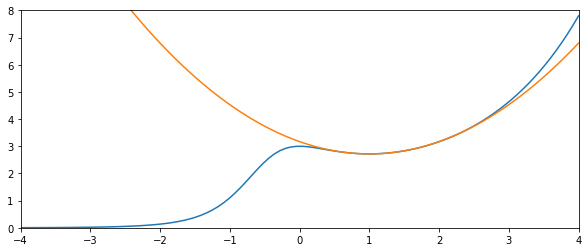

In [ ]:
taylor3 = a0 + a1*(xs-x) + a2*(xs-x)**2 + a3*(xs-x)**3

fig, ax = plt.subplots(figsize=(10, 4))
plt.xlim([-4,4])
plt.ylim([0,8])
ax.plot(xs,ys, xs,taylor3);

What happened is that, around $x=1$, we can use a much simpler function (a polinomial of degree 3) instead of the original function (which includes exponentiation and division by a quadratic polynomial). We can zoom around $x=1$ to check how good this approximation is:  

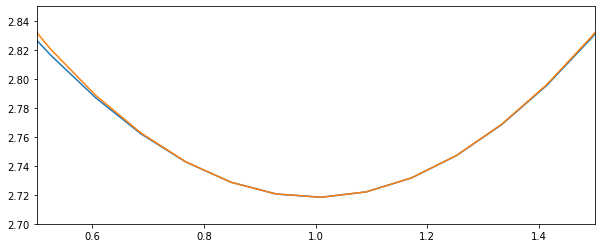

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(xs,ys, xs,taylor3), plt.xlim([0.5,1.5]), plt.ylim([2.7,2.85]);

## Automatic Differentiation

Automatic differentiation (autodiff) is a tecnique capable of giving an exact answer to differential values in constant time.

### Dual Numbers

Dual numbers have form $a + b \epsilon$, where $\epsilon^2=0$.

We can compute the value of arithmetic expressions over dual numbers.

Eg:

* $(a+b\epsilon) + (c+d\epsilon) = (a+c) + (b+d) \epsilon$

* $(a+b\epsilon) \times (c+d\epsilon) = ac + (ad+bc) \epsilon$

Now consider the Taylor Expansion of a function $f(a)$ at value $a+\epsilon$:

$$f(a+\epsilon) = f(a) + \frac{f'(a)}{1!} \epsilon + \frac{f''(a)}{2!}\epsilon^2 + \ldots$$

but all $\epsilon^n$, with $n>1$, will be zero, so:

$$f(a+\epsilon) = f(a) + f'(a) \epsilon$$

This is an exact solution, not an approximation (!!)

Let's check an example, $f(x) = x^2+1$:

$f(x+\epsilon) = (x+\epsilon)^2 + 1 = x^2 + \epsilon^2 + 2x\epsilon + 1 = x^2 + 1 + 2x\epsilon$

This means that $2x$ is the derivative of $x^2+1$

However, for more complex expressions there is a more efficient algorithm.

### Reverse Mode Differentiation

The Jacobian Matrix is a matrix that takes the partial derivatives of each element of a function $f : \mathbb{R}^n \rightarrow \mathbb{R}^m$

$$J_f=\begin{bmatrix}
\frac{\partial y_1}{\partial x_1} & \ldots & \frac{\partial y_1}{\partial x_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial y_m}{\partial x_1} & \ldots & \frac{\partial y_m}{\partial x_n}   
\end{bmatrix}$$

where $x_i$ is the i-th input and $y_j$ the j-th output.

An example with `sympy`:

In [ ]:
from IPython.display import display, Math, Latex
from ipywidgets      import interact, widgets
from sympy import sin, cos, Matrix, latex
from sympy.abc import rho, phi

X = Matrix([rho*cos(phi), rho*sin(phi), rho**2])
Y = Matrix([rho, phi])

display(Math('\\text{The Jacobian of } f(\\rho,\\phi) = ' + latex(X)
             + '\\text{ is }' + latex(X.jacobian(Y)) ))

<IPython.core.display.Math object>

Let's apply autodiff to compute the Jacobian of a vector valued function using a technique denoted **reverse mode differentiation**.

Our example function will be $f(x_1, x_2) = x_1x_2 - \sin(x_2)$.

We would like to evaluate $f^´(2,3)$.

First we need the respective [computational graph](https://medium.com/tebs-lab/deep-neural-networks-as-computational-graphs-867fcaa56c9):


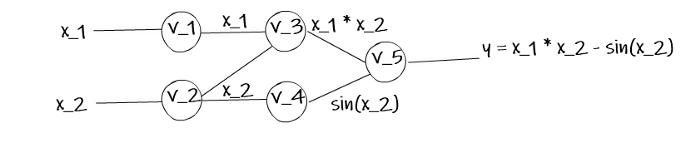

Then we compute the *primal trace*, which is the set of intermediate values at each node:

$$\begin{array}{ccccc}
v_1 &=& x_1 &=& 2 \\
v_2 &=& x_2 &=&3 \\
v_3 &=& v_1 \times v_2 &=& 6 \\
v_4 &=& \sin v_2 &\approx& 0.14 \\
v_5 &=& v_3 - v_4 &\approx& 5.86 \\
y &=& v_5 &\approx& 5.86
\end{array}$$

Since each node corresponds to a single operation, all derivatives are easily known.

The next step is to compute the dual trace.

The *dual trace* measures how much each intermediate node varies with respect to the input

$$\frac{\partial v_i}{\partial x}$$

To compute the dual trace we need to apply the chain rule:

> The chain rule is a technique to break apart a derivative we don’t know how to solve into derivatives that we do know how to solve.

Herein,

$$\frac{\partial y_j}{\partial v_i} = \frac{\partial y_j}{\partial v_k} \frac{\partial v_k}{\partial v_i}$$

where $v_k$ is the parent of $v_i$ in the computational graph. If $v_i$ has more than one parent, we sum all contributions,

$$\frac{\partial y_j}{\partial v_i} = \sum_{p \in \text{parents}(i)} \frac{\partial y_j}{\partial v_p} \frac{\partial v_p}{\partial v_i}$$

This expression is called the *adjoint* of $v_i$ and denoted as $\overline{v_i}$.

It's possible to define the adjoint of a node in terms of the adjoints of its parents (eg: $v_3$ is parent of $v_1$ and $v_2$)

$$\overline{v_i} = \sum_p \overline{v_p}\frac{\partial v_p}{\partial v_i}$$

which give us a recursive algorithm. [ref](https://stats.stackexchange.com/questions/224140/step-by-step-example-of-reverse-mode-automatic-differentiation)

The dual trace starts at the end, at node $y$, and propagates backwards to its dependencies.

So the seed is $\frac{\partial y}{\partial y} = 1$ which means a change in $y$ results in exactly the same change in $y$ (duh!).

Since $y = v_5$,

$$\overline{v_5} = \overline{y} \times \frac{\partial y}{\partial v_5} = 1 \times 1 = 1$$

Since $v_5 = v_3 - v_4$,

$$\overline{v_3} = \overline{v_5} \times \frac{\partial v_5}{\partial v_3} = 1 \times 1 = 1$$

$$\overline{v_4} = \overline{v_4} \times \frac{\partial v_5}{\partial v_4} = 1 \times -1 = -1$$

Since $v_3 = v_1 \times v_2$ and $v_4 = \sin v_2$, $v_2$ has parents $v_3$ and $v_4$,

$$\overline{v_2} = \overline{v_3} \times \frac{\partial v_3}{\partial v_2} + \overline{v_4} \times \frac{\partial v_4}{\partial v_2}  = 1 \times v_1 - \cos v_2 = v_1 - \cos v_2$$

Notice that we already know the values of $v_1$ and $v_2$ from the primal trace,

$$\overline{v_2} = 2 - \cos(3) \approx 2.99$$

For $v_1$ its only parent is $v_3$,

$$\overline{v_1} = \overline{v_3} \times \frac{\partial v_3}{\partial v_1} = 1 \times v_2 = v_2 = 3$$

And the dual trace is done.

We wish to evaluate $f^´(2,3)$, ie,

$$\frac{\partial y}{\partial x_1}, \frac{\partial y}{\partial x_2}$$

these values are given by $\overline{v_1}$ and $\overline{v_2}$, that is,

$$\frac{\partial y}{\partial x_1} = 3, \frac{\partial y}{\partial x_2} \approx 2.99$$

Just to check the result against `sympy`:

In [ ]:
from sympy import symbols
x1, x2 = symbols('x1 x2')

f = x1*x2 - sin(x2)
X = Matrix([f])
Y = Matrix([x1, x2])
jacobian = X.jacobian(Y)

display(Math('\\text{The Jacobian of } f(x_1,x_2) = ' + latex(f)
             + '\\text{ is }' + latex(jacobian) ))

diffValue = jacobian.evalf(subs={x1:2, x2:3})

print('\nDerivate of f at point (2,3): ', end=" ")
print(np.array(diffValue).astype(np.float64).round(2))

<IPython.core.display.Math object>


Derivate of f at point (2,3):  [[3.   2.99]]


The advantage of autodiff is that this process can be automated, while *keeping the complexity proportional to the number of nodes*.

Of course, there are modules that perform autodiff:

In [ ]:
from autograd import grad
import autograd.numpy as np

help(grad)

Help on function grad in module autograd.wrap_util:

grad(fun, argnum=0, *nary_op_args, **nary_op_kwargs)
    Returns a function which computes the gradient of `fun` with respect to
    positional argument number `argnum`. The returned function takes the same
    arguments as `fun`, but returns the gradient instead. The function `fun`
    should be scalar-valued. The gradient has the same type as the argument.



In [ ]:
def f(x1, x2):
  return x1*x2 - np.sin(x2)

gradF = grad(f, [0,1])
diffValue = gradF(2.0,3.0)
print("Gradient of f(2,3) is", np.array(diffValue).astype(np.float64).round(2) )

Gradient of f(2,3) is [3.   2.99]


An important point is that autodiff is able to find the derivative/gradient of a Python function even if the function includes conditionals, while loops and even recursion (!)

One immediate application for autodiff would be finding minimums of functions using [gradient descent](https://tillbe.github.io/python-gradient-descent.html).

For those readers that think this reminds you of backpropagation, the classical learning algorithm for Neural Networks, it is not a coincidence: [backpropagation is a subset of reverse mode differentiation](https://stackoverflow.com/questions/49926192).

## References

* Mark Saroufim, [Automatic Differentiation Step by Step](https://medium.com/@marksaroufim/automatic-differentiation-step-by-step-24240f97a6e6) (2019)

* [Automatic Differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) @ wikipedia

* [Step-by-step example of reverse-mode automatic differentiation](https://stats.stackexchange.com/questions/224140) @ StackExchange

* Peter Sharpe, [Autograd tutorial](https://github.com/HIPS/autograd/blob/master/docs/tutorial.md) (2019)

* Eli Bendersky, [The Chain Rule of Calculus](https://eli.thegreenplace.net/2016/the-chain-rule-of-calculus/) (2016)
